###data-source : https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

##1.Load Data


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/predictive_maintenance.csv')

# Display the first few rows
data



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


##2.Understand the data

###a.Check the first few rows of the dataset to understand the variables and their values.

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


###b.Check the structure and data types of columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


###c. Check for missing values

In [ ]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


###d.Summary Statistics

In [ ]:
# Calculate basic summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)




Summary Statistics:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.0000


### e.Data with   machine failure

In [ ]:
#Target = 1 means failure
fail_machine = data[data["Target"] == 1]
fail_machine.shape

(339, 10)

In [ ]:
data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

##3.Visualisations

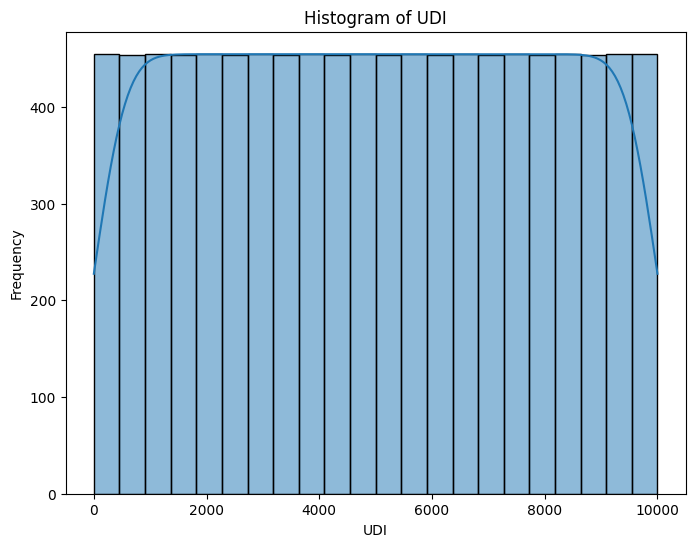

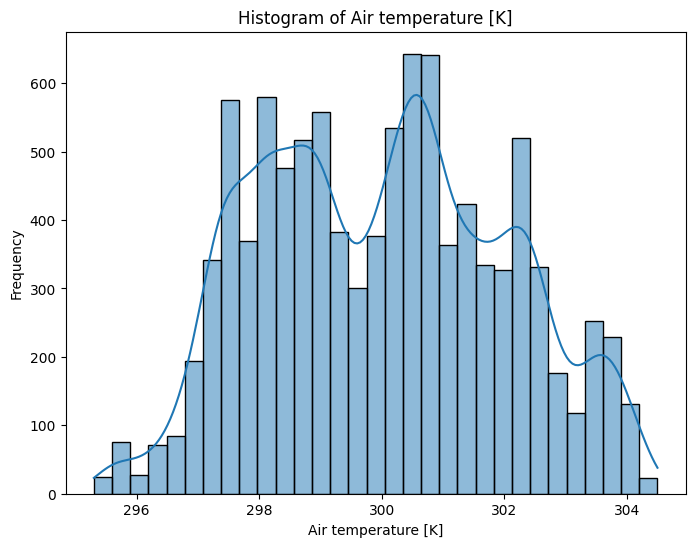

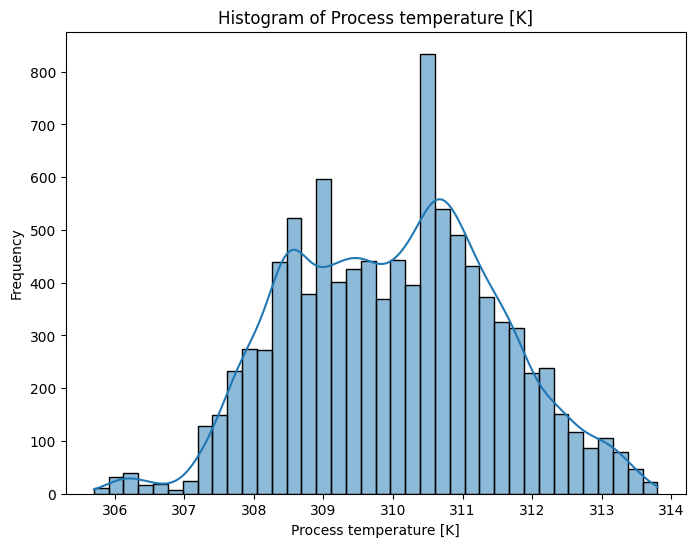

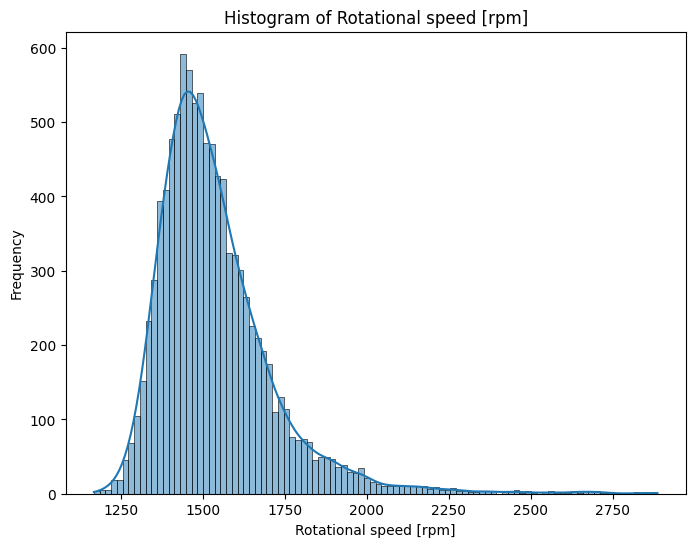

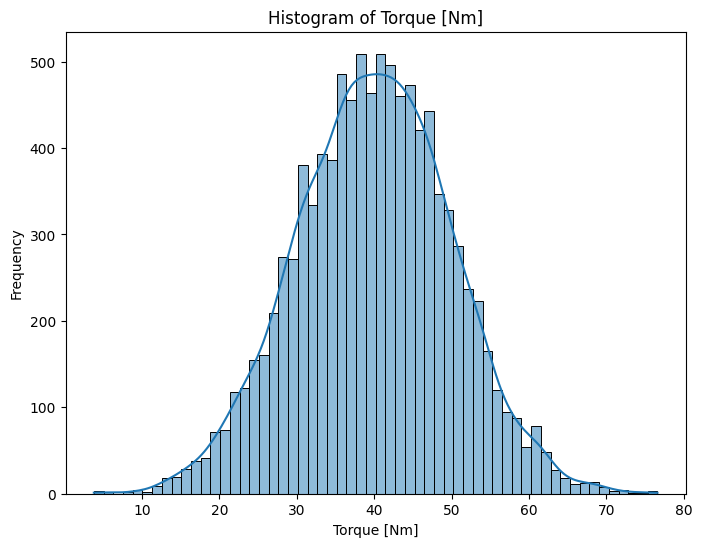

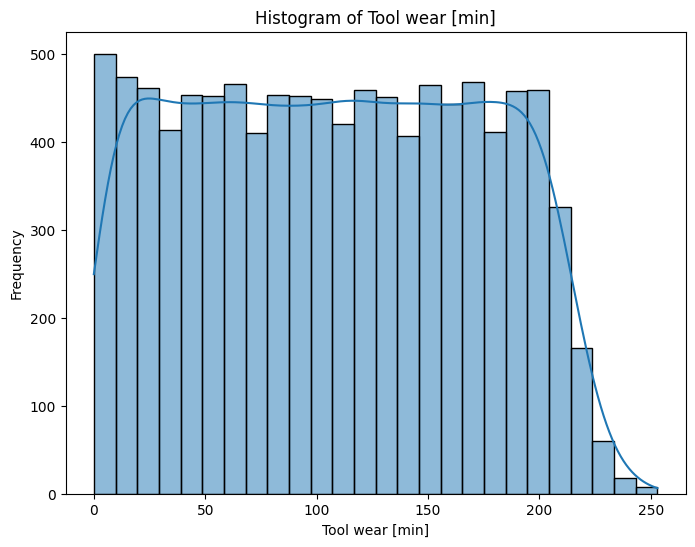

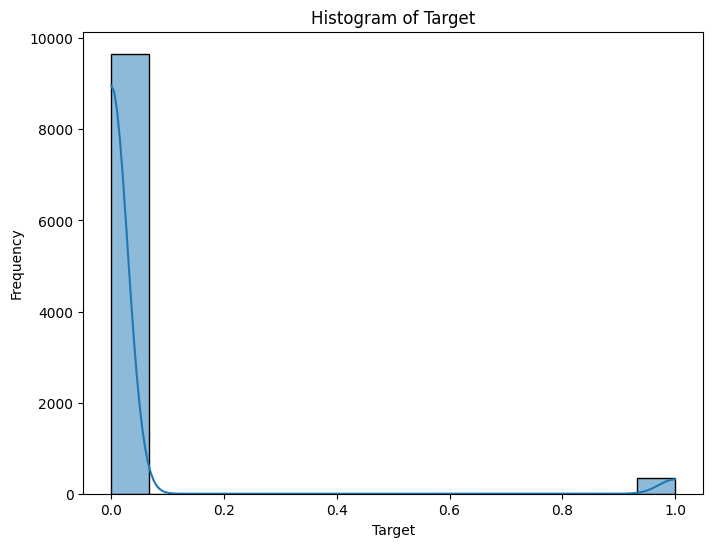

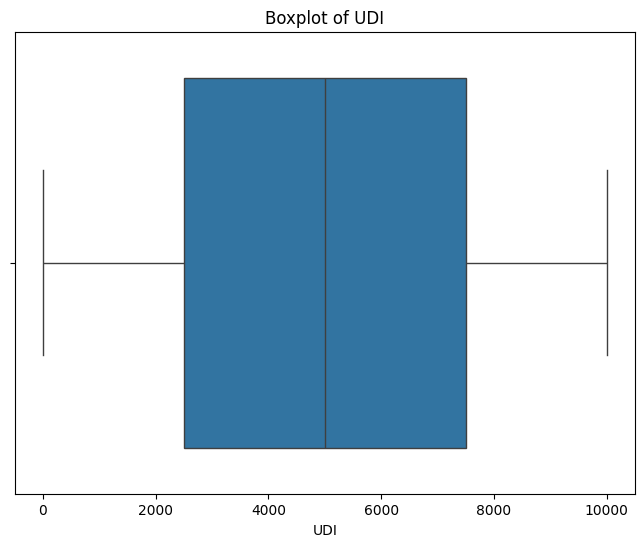

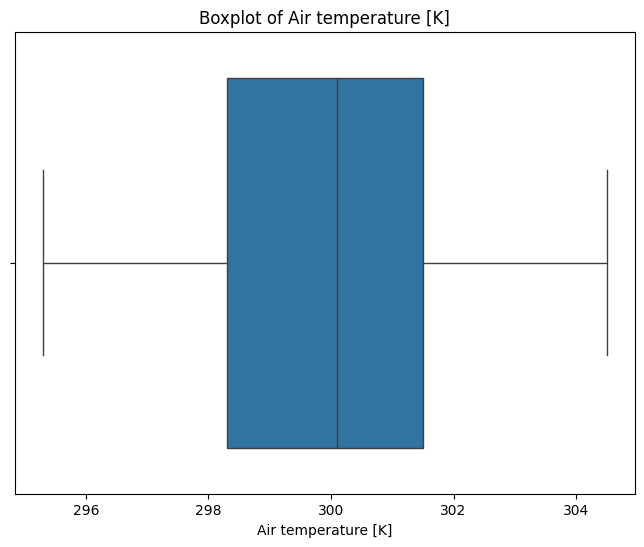

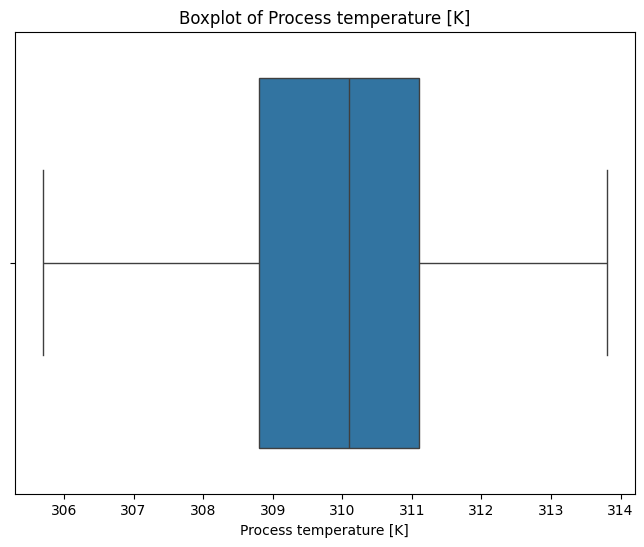

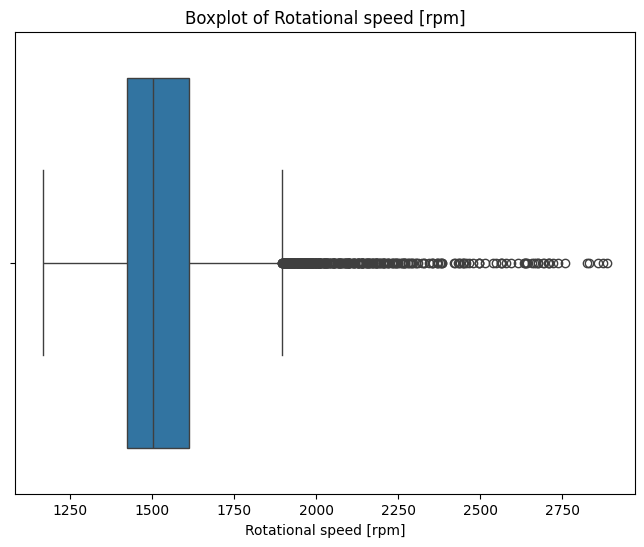

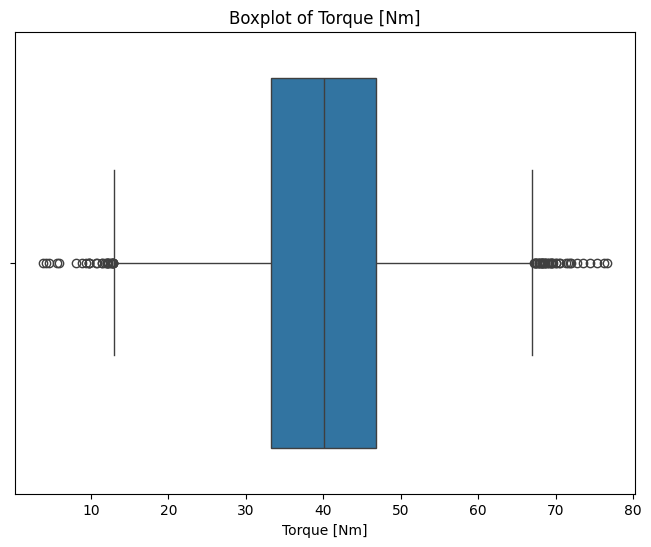

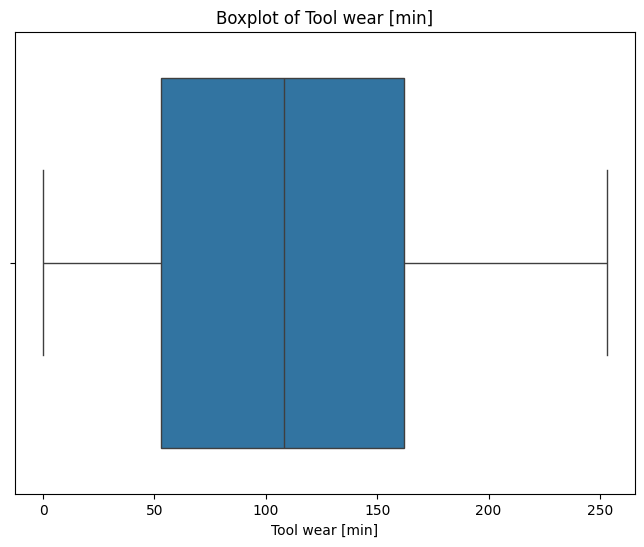

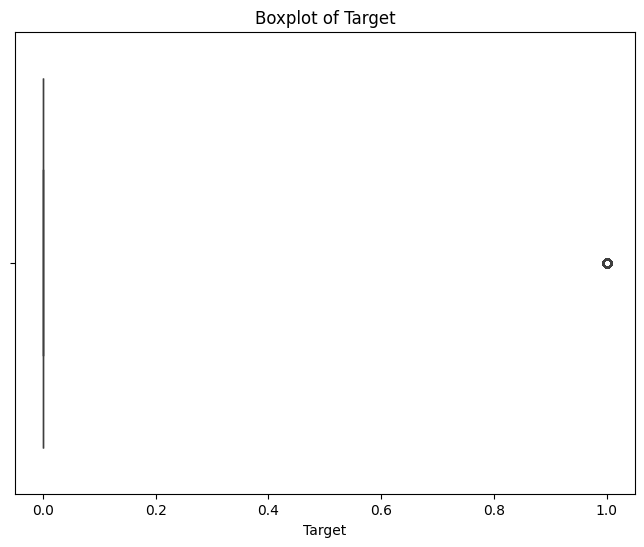

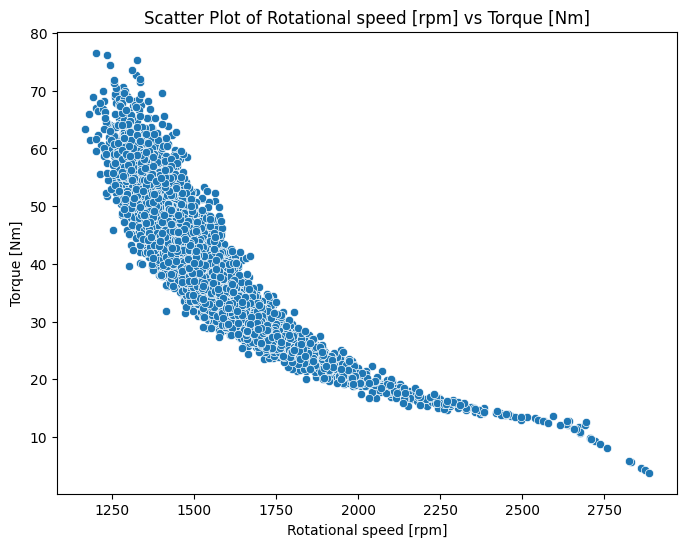

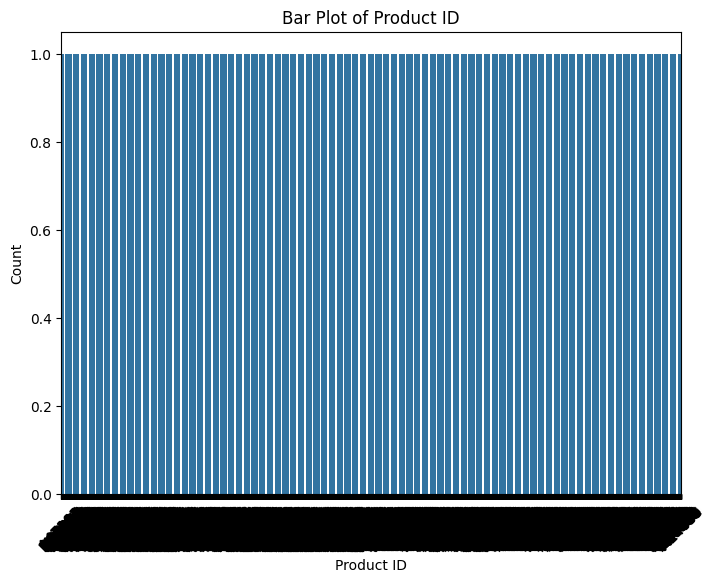

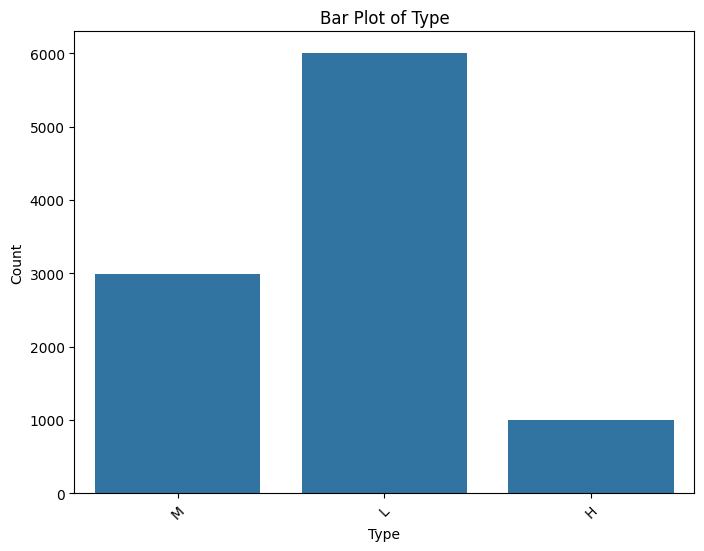

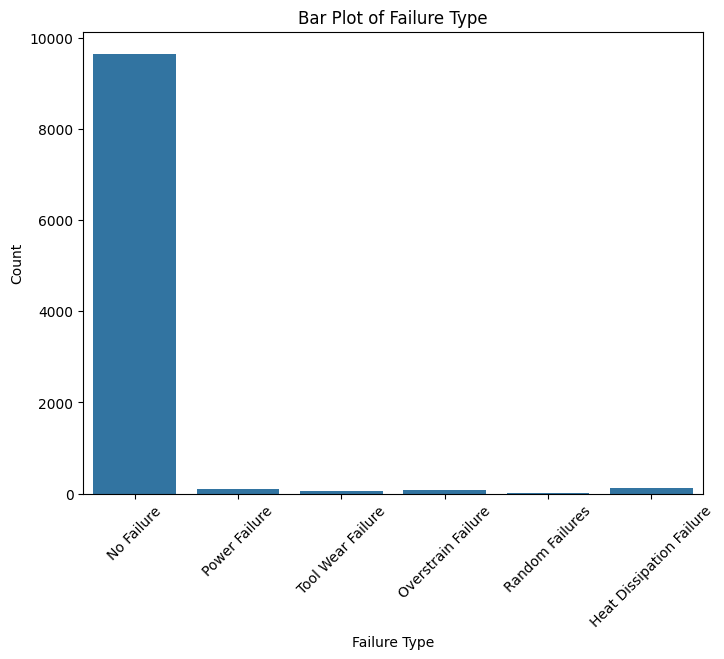

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Scatter plot for 'Rotational speed [rpm]' vs 'Torque [Nm]'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=data)
plt.title('Scatter Plot of Rotational speed [rpm] vs Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()


# Bar plot for categorical variables
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


###a.Get data central tendency

In [ ]:

# Calculate mean, median, and mode for numeric columns
mean_values = data[numerical_columns].mean()
median_values = data[numerical_columns].median()
mode_values = data[numerical_columns].mode().iloc[0]

print("\nMean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)



Mean values:
UDI                        5000.50000
Air temperature [K]         300.00493
Process temperature [K]     310.00556
Rotational speed [rpm]     1538.77610
Torque [Nm]                  39.98691
Tool wear [min]             107.95100
Target                        0.03390
dtype: float64

Median values:
UDI                        5000.5
Air temperature [K]         300.1
Process temperature [K]     310.1
Rotational speed [rpm]     1503.0
Torque [Nm]                  40.1
Tool wear [min]             108.0
Target                        0.0
dtype: float64

Mode values:
UDI                           1.0
Air temperature [K]         300.7
Process temperature [K]     310.6
Rotational speed [rpm]     1452.0
Torque [Nm]                  40.2
Tool wear [min]               0.0
Target                        0.0
Name: 0, dtype: float64


###b. Variability and Spread

In [ ]:
# Calculate range, variance, and standard deviation for numerical columns
range_values = data[numerical_columns].max() - data[numerical_columns].min()
variance_values = data[numerical_columns].var()
std_deviation = data[numerical_columns].std()

print("\nRange of numerical columns:")
print(range_values)
print("\nVariance of numerical columns:")
print(variance_values)
print("\nStandard Deviation of numerical columns:")
print(std_deviation)



Range of numerical columns:
UDI                        9999.0
Air temperature [K]           9.2
Process temperature [K]       8.1
Rotational speed [rpm]     1718.0
Torque [Nm]                  72.8
Tool wear [min]             253.0
Target                        1.0
dtype: float64

Variance of numerical columns:
UDI                        8.334167e+06
Air temperature [K]        4.001035e+00
Process temperature [K]    2.201467e+00
Rotational speed [rpm]     3.214279e+04
Torque [Nm]                9.937964e+01
Tool wear [min]            4.051850e+03
Target                     3.275407e-02
dtype: float64

Standard Deviation of numerical columns:
UDI                        2886.895680
Air temperature [K]           2.000259
Process temperature [K]       1.483734
Rotational speed [rpm]      179.284096
Torque [Nm]                   9.968934
Tool wear [min]              63.654147
Target                        0.180981
dtype: float64


###c.Identify Outlier

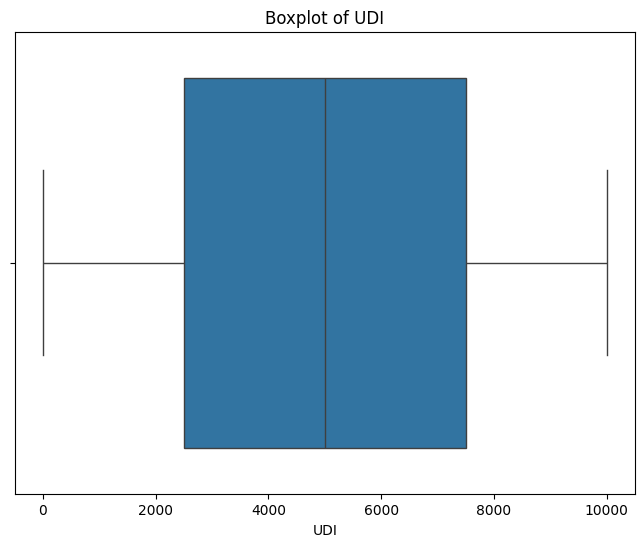

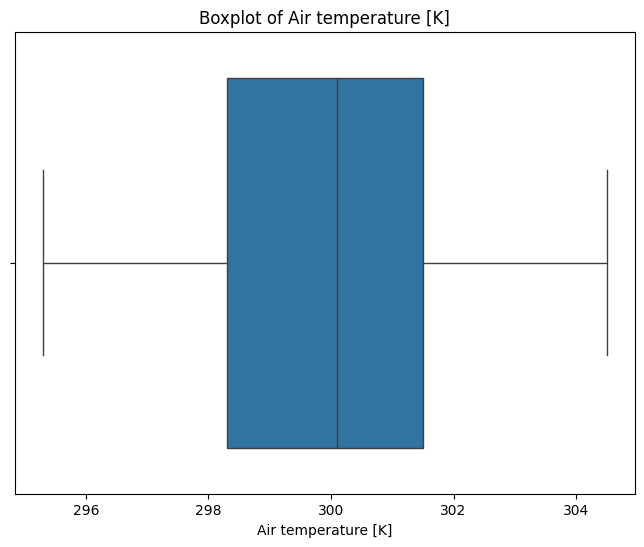

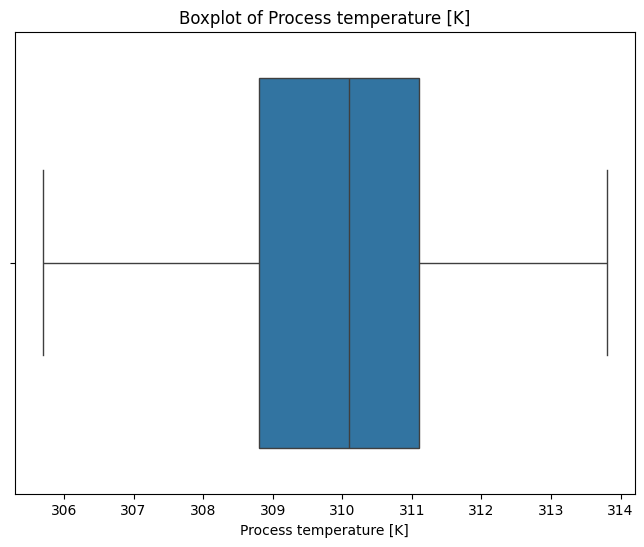

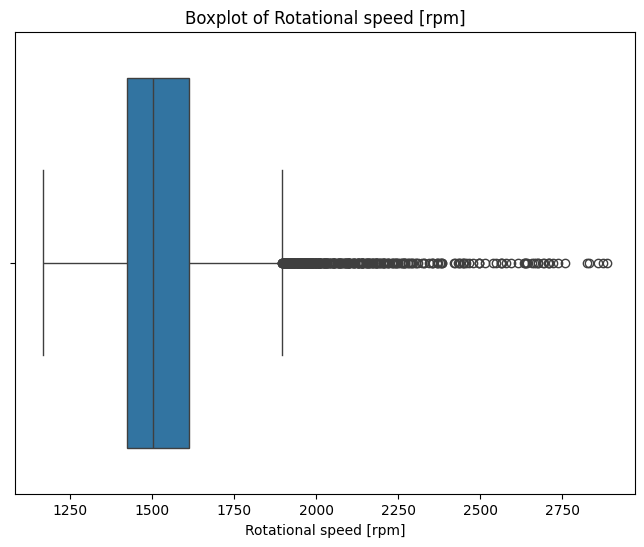

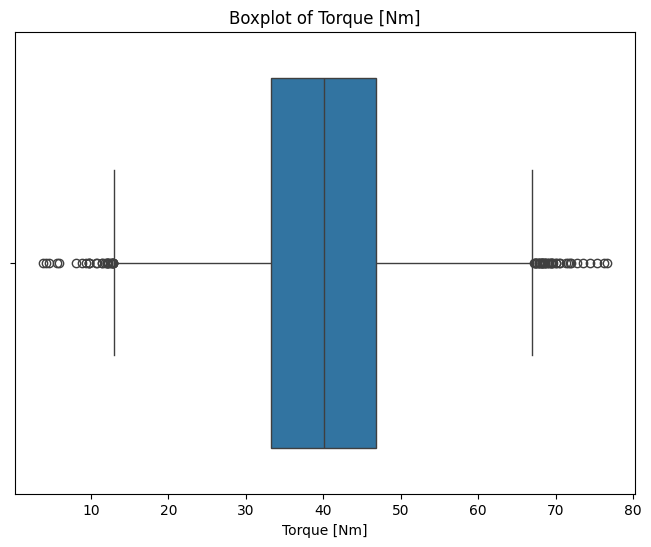

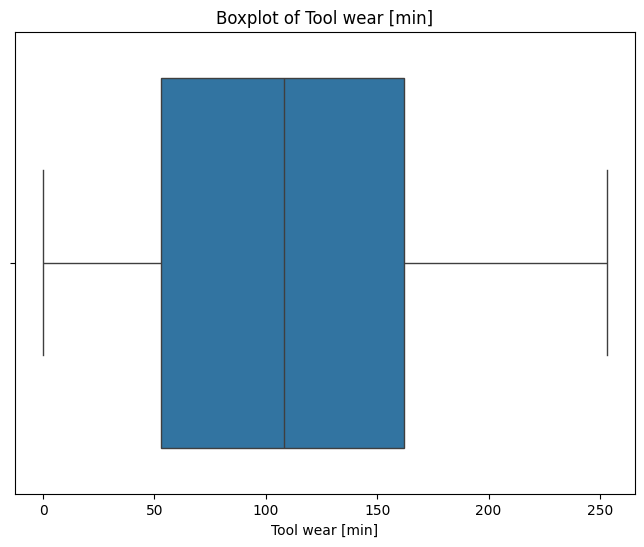

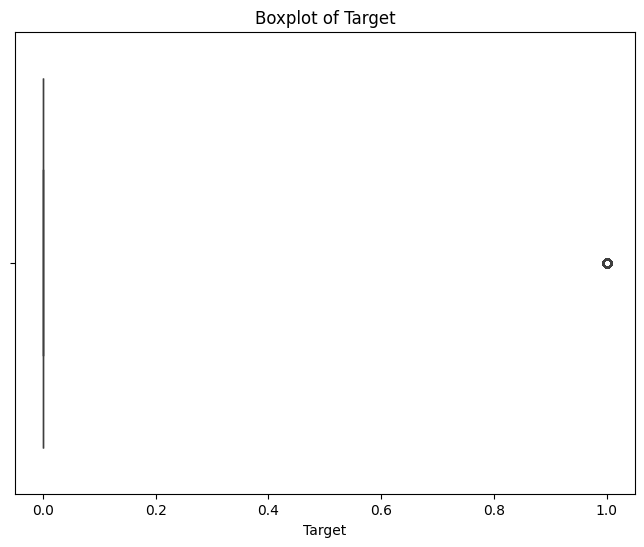

In [ ]:
# Boxplots or other methods to identify outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


###d. Correlation Analysis

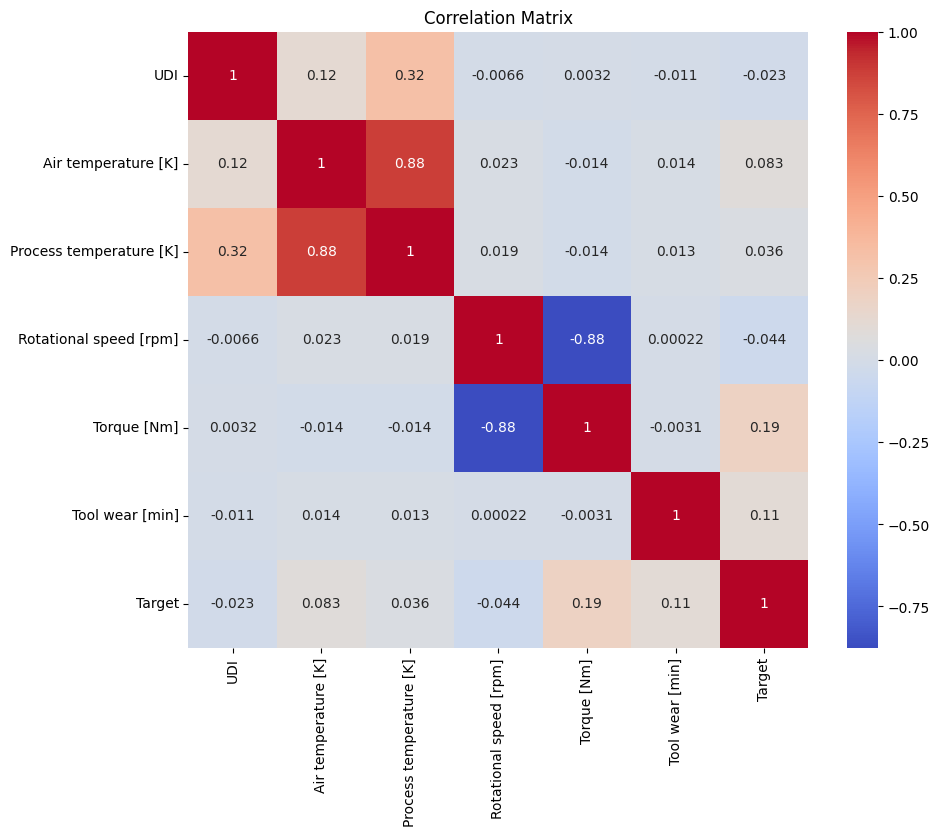

In [ ]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##3.Data clean up

###1.Handle missing value

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


###2.Check duplicates

In [ ]:
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of Duplicate Rows:", num_duplicates)

# Display duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate Rows:")
print(duplicate_data)

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []


In [ ]:
### Check Outliers by Graph

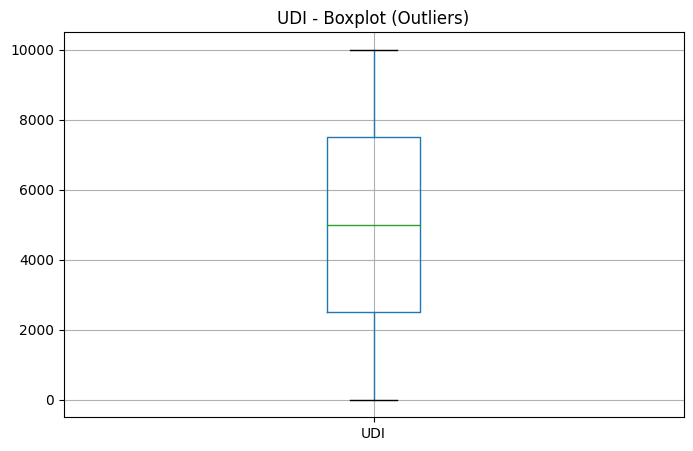

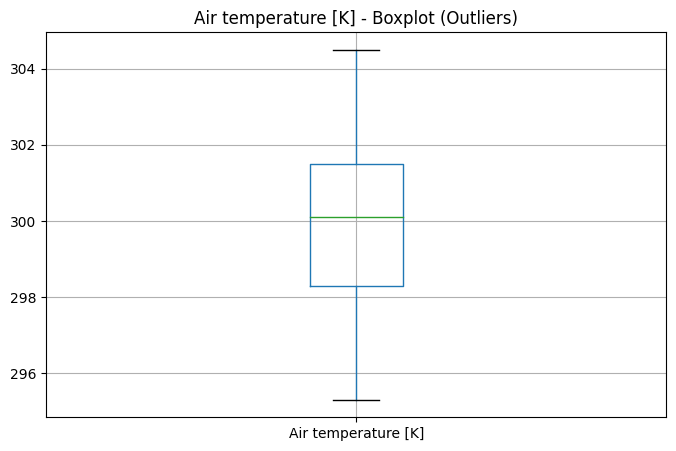

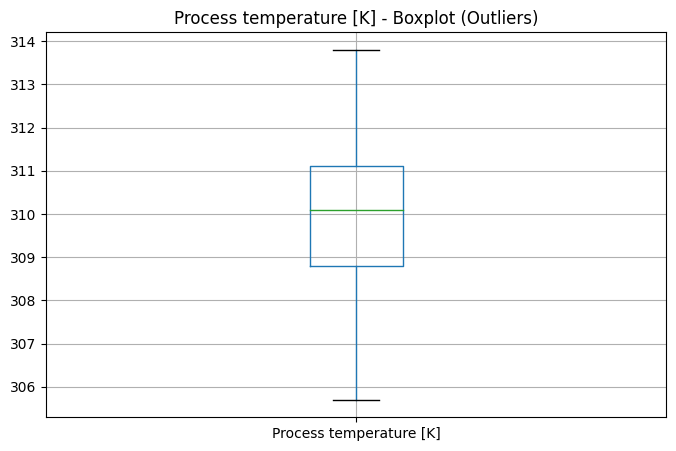

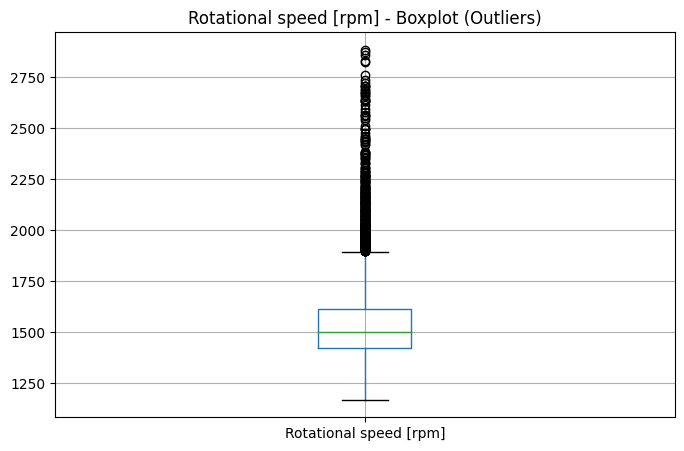

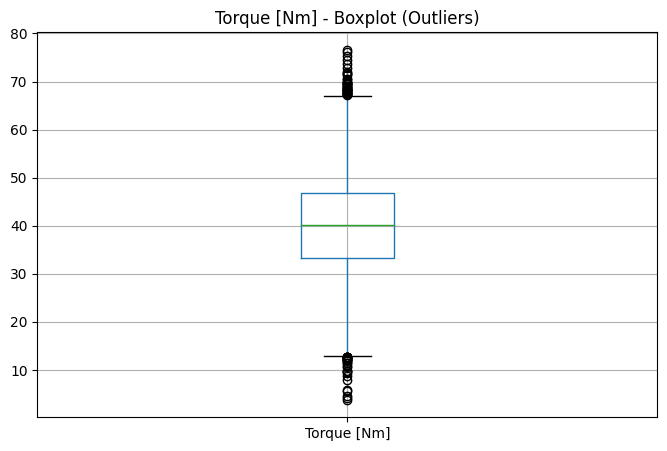

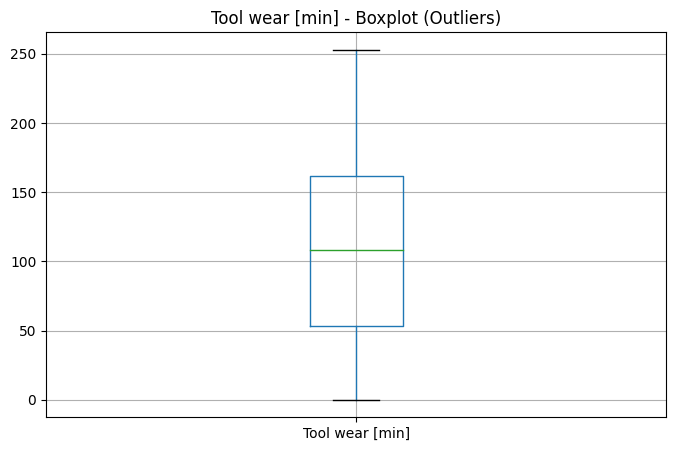

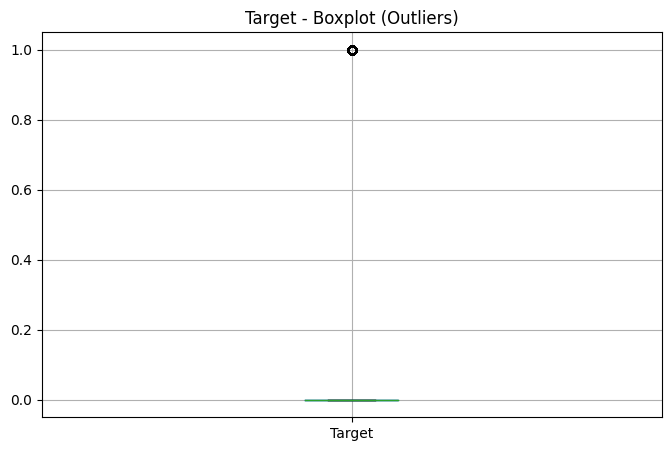

In [ ]:
import matplotlib.pyplot as plt

# Create boxplots for numerical columns to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(col + ' - Boxplot (Outliers)')
    plt.show()


In [ ]:
##Identify outliers

In [ ]:
def identify_outliers(data, columns, threshold=1.5):
    """
    Identify outliers in the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with rows flagged as outliers along with the column name and reason.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - outliers_df: DataFrame with flagged outliers and reasons
    """
    outliers_info = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Add information for each outlier row
        for index, row in outliers.iterrows():
            outlier_info = {
                'Value': row[col],
                'Column': col,
                'Reason': 'Below Lower Bound' if row[col] < lower_bound else 'Above Upper Bound'
            }
            outliers_info.append(outlier_info)

    # Create a new dataframe with outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify outliers in numerical columns using IQR and create dataframe with flag and reasons
outliers_df = identify_outliers(data, numerical_columns, threshold=1.5)

# Display the outliers dataframe
print("Outliers DataFrame:")
print(outliers_df.head())

# Save the outliers dataframe to a new CSV file (optional)
#outliers_df.to_csv('outliers_flagged.csv', index=False)


Outliers DataFrame:
    Value                  Column             Reason
0  2035.0  Rotational speed [rpm]  Above Upper Bound
1  2861.0  Rotational speed [rpm]  Above Upper Bound
2  1924.0  Rotational speed [rpm]  Above Upper Bound
3  1991.0  Rotational speed [rpm]  Above Upper Bound
4  1987.0  Rotational speed [rpm]  Above Upper Bound


In [ ]:
#### Clean outliers

In [ ]:
def remove_outliers_iqr_with_report(data, columns, threshold=1.5):
    """
    Remove outliers from the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with removed outliers and returns it along with a report of removed rows.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - cleaned_data: DataFrame with outliers removed
        - removed_data: DataFrame containing removed rows
    """
    removed_rows = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Append the outliers to the removed_rows list
        removed_rows.extend(outliers.index.tolist())

    # Remove duplicate indices in the removed_rows list
    removed_rows = list(set(removed_rows))

    # Create a new dataframe with removed rows
    removed_data = data.loc[removed_rows]

    # Remove outliers from the original dataframe
    cleaned_data = data.drop(removed_rows)

    return cleaned_data, removed_data

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from numerical columns using IQR and get removed rows
cleaned_data, removed_data = remove_outliers_iqr_with_report(data, numerical_columns, threshold=1.5)

# Display shape of original and cleaned data
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

# Display the removed rows
print("\nRows Removed as Outliers:")
print(removed_data)


Original Data Shape: (10000, 10)
Cleaned Data Shape: (9274, 10)

Rows Removed as Outliers:
       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
4096  4097     L51276    L                301.9                    310.4   
8192  8193     L55372    L                299.6                    310.9   
6147  6148     M21007    M                301.1                    311.1   
8195  8196     L55375    L                299.4                    310.8   
8199  8200     L55379    L                299.2                    310.7   
...    ...        ...  ...                  ...                      ...   
4087  4088     L51267    L                301.9                    310.4   
8184  8185     L55364    L                299.8                    311.1   
6137  6138     M20997    M                300.9                    310.8   
4090  4091     L51270    L                302.0                    310.5   
8189  8190     L55369    L                299.7                    311.0 

###3.Drop Unnecessary Columns

In [ ]:
# Drop 'UID' and 'product ID' columns
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)



In [ ]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


##4.Data Preparation/Transformation

###1.Encode categorical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'product quality' column
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,1
9996,0,298.9,308.4,1632,31.8,17,0,1
9997,2,299.0,308.6,1645,33.4,22,0,1
9998,0,299.0,308.7,1408,48.5,25,0,1


In [ ]:
# Encode 'Type' column
label_encoder_type = LabelEncoder()
data['Type'] = label_encoder_type.fit_transform(data['Type'])

# Encode 'Failure Type' column
label_encoder_failure_type = LabelEncoder()
data['Failure Type'] = label_encoder_failure_type.fit_transform(data['Failure Type'])

# Display the mapping for 'Type'
type_mapping = dict(zip(label_encoder_type.classes_, label_encoder_type.transform(label_encoder_type.classes_)))
print("Type column mapping:", type_mapping)

# Display the mapping for 'Failure Type'
failure_type_mapping = dict(zip(label_encoder_failure_type.classes_, label_encoder_failure_type.transform(label_encoder_failure_type.classes_)))
print("Failure Type column mapping:", failure_type_mapping)

# Display the transformed DataFrame
print(data)

Type column mapping: {0: 0, 1: 1, 2: 2}
Failure Type column mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408     

###2.Normalize the value

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalize the specified numerical columns in the DataFrame using Min-Max scaling.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to normalize

    Returns:
        - normalized_data: DataFrame with normalized columns
    """
    scaler = MinMaxScaler()
    data_normalized = data.copy()
    data_normalized[columns] = scaler.fit_transform(data_normalized[columns])

    return data_normalized

# List of numerical columns to normalize
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max scaling
normalized_data = normalize_data(data, numerical_columns)

# Display the first few rows of normalized data
print("Normalized Data:")
print(normalized_data.head())

# Save the normalized data to a new CSV file (optional)
#normalized_data.to_csv('normalized_machine_failure_data.csv', index=False)
normalized_data

Normalized Data:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   1.0             0.304348                 0.358025                0.222934   
1   0.5             0.315217                 0.370370                0.139697   
2   0.5             0.304348                 0.345679                0.192084   
3   0.5             0.315217                 0.358025                0.154249   
4   0.5             0.315217                 0.370370                0.139697   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.535714         0.000000     0.0           0.2  
1     0.583791         0.011858     0.0           0.2  
2     0.626374         0.019763     0.0           0.2  
3     0.490385         0.027668     0.0           0.2  
4     0.497253         0.035573     0.0           0.2  


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.2
1,0.5,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.2
2,0.5,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.2
3,0.5,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.2
4,0.5,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.2
...,...,...,...,...,...,...,...,...
9995,1.0,0.380435,0.333333,0.253783,0.353022,0.055336,0.0,0.2
9996,0.0,0.391304,0.333333,0.270081,0.384615,0.067194,0.0,0.2
9997,1.0,0.402174,0.358025,0.277648,0.406593,0.086957,0.0,0.2
9998,0.0,0.402174,0.370370,0.139697,0.614011,0.098814,0.0,0.2


###3.Split data into train, validation and test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the normalized data
#normalized_data = pd.read_csv('normalized_machine_failure_data.csv')

# Split the data into features (X) and target (y)
x = data.drop('Failure Type', axis=1)
y = data['Failure Type']

# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further split the training data into training (70%) and validation (10%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (7000, 7) (7000,)
Validation set shape: (1000, 7) (1000,)
Testing set shape: (2000, 7) (2000,)


##5.Train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# Build and train Random Forest Classifier
clf_random_forest = RandomForestClassifier(random_state=42)
clf_random_forest.fit(x_train, y_train)
y_pred_random_forest = clf_random_forest.predict(x_test)
score_random_forest = clf_random_forest.score(x_test,y_test)
print("Random Forest Classifier Score:", score_random_forest)

Random Forest Classifier Score: 0.9945


In [ ]:
# Build and train Gradient Boosting Classifier
clf_gradient_boosting = GradientBoostingClassifier(random_state=42)
clf_gradient_boosting.fit(x_train, y_train)
y_pred_gradient_boosting = clf_gradient_boosting.predict(x_test)
score_gradient_boosting = clf_gradient_boosting.score(x_test,y_test)
print("Gradient Boosting Classifier score:", score_gradient_boosting)

Gradient Boosting Classifier score: 0.9925


In [ ]:
# Build and train Support Vector Machine (SVM) Classifier
clf_svm = SVC(kernel='rbf', C=1, random_state=42)
clf_svm.fit(x_train, y_train)
y_pred_svm = clf_svm.predict(x_test)
score_svm = clf_svm.score(x_test,y_test)
print("SVM Classifier score:", score_svm)

SVM Classifier score: 0.968


In [ ]:
# Neural Networks (MLP)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)
print("Neural Networks Accuracy:", accuracy_score(y_test, y_pred_nn))

Neural Networks Accuracy: 0.963


##7.Evaluate the Model

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [ ]:
#Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))

# Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gradient_boosting))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gradient_boosting))

# Support Vector Machines
print("Support Vector Machines Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Support Vector Machines Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


# Neural Networks
print("Neural Networks Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Neural Networks Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))




Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00      1935
           2       0.75      0.92      0.83        13
           3       1.00      0.95      0.97        20
           4       0.00      0.00      0.00         6
           5       1.00      0.73      0.84        11

    accuracy                           0.99      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.99      0.99      0.99      2000

Random Forest Confusion Matrix:
[[  15    0    0    0    0    0]
 [   0 1935    0    0    0    0]
 [   1    0   12    0    0    0]
 [   0    0    1   19    0    0]
 [   0    6    0    0    0    0]
 [   0    0    3    0    0    8]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       1.00      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
basic_model_dict = {
    'Support Vector Classifier' : clf_svm,
    'Gradient Boosting Classifier' : clf_gradient_boosting,
    'Random Forest Classifier' : clf_random_forest,
    'MLP Neural Network' : nn
    }

In [ ]:
def Evaluation_model(model_dict):
    Accuracy = []
    F1_score = []
    Model_name = []
    for name,model in model_dict.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        Accuracy.append(accuracy_score(y_test,y_pred))
        F1_score.append(f1_score(y_test,y_pred, average='micro'))
        Model_name.append(name)
        dict = {'Model Name' : Model_name, 'Accuracy' : Accuracy, 'F1 Score' : F1_score}
        df = pd.DataFrame(dict)
    return df

In [ ]:
df_evaluation = Evaluation_model(basic_model_dict)

In [ ]:
df_evaluation

,Model Name,Accuracy,F1 Score
0,Support Vector Classifier,0.9680,0.9680
1,Gradient Boosting Classifier,0.9925,0.9925
2,Random Forest Classifier,0.9945,0.9945
3,MLP Neural Network,0.9630,0.9630


##6.Data Prediction

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
kfold = StratifiedKFold()

In [ ]:
def model_performance_visualization(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Accuracy Score of the model : ' , accuracy_score(y_test,y_pred))
    print(f'F1 Score of the model : ' , f1_score(y_test,y_pred, average = 'micro'))
    print(f'Cross Val Score of the model : ', np.mean(cross_val_score(model,x,y,cv = kfold)))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels = model.classes_)
    disp.plot()
    plt.show()

Accuracy Score of the model :  0.9945
F1 Score of the model :  0.9945
Cross Val Score of the model :  0.9931000000000001


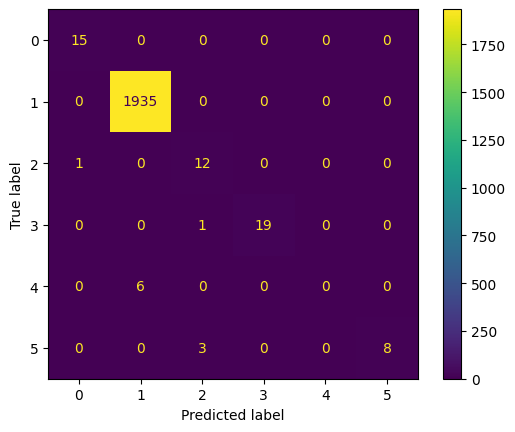

In [ ]:
model_performance_visualization(clf_random_forest)

Accuracy Score of the model :  0.9925
F1 Score of the model :  0.9925
Cross Val Score of the model :  0.9183999999999999


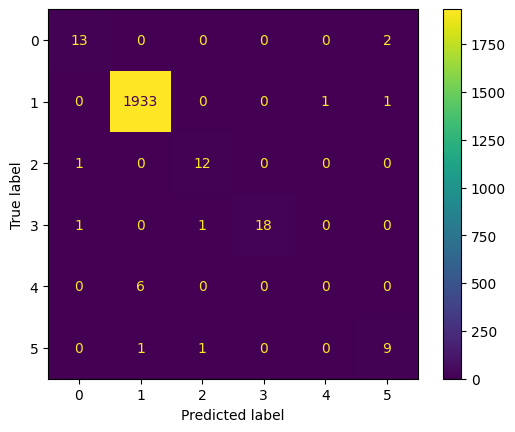

In [ ]:
model_performance_visualization(clf_gradient_boosting)

Accuracy Score of the model :  0.968
F1 Score of the model :  0.968
Cross Val Score of the model :  0.9658999999999999


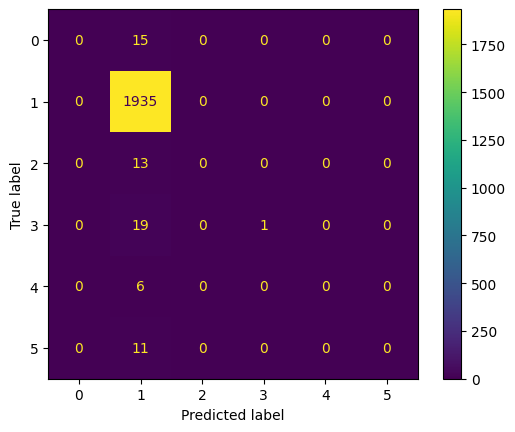

In [ ]:
model_performance_visualization(clf_svm)

Accuracy Score of the model :  0.963
F1 Score of the model :  0.963
Cross Val Score of the model :  0.9746


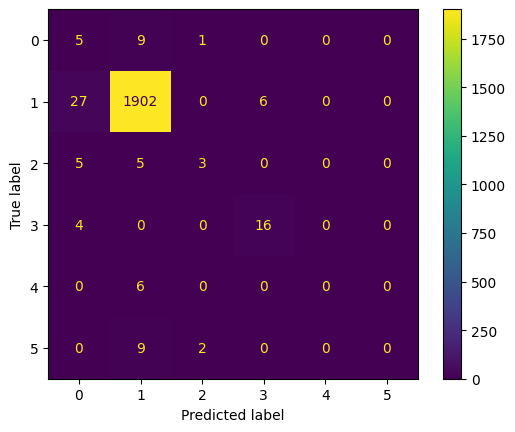

In [ ]:
model_performance_visualization(nn)



##7. Display the prediction accuracy of the best model: Random Forest Classifier

In [ ]:
# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test,'Predicted RF': y_pred_random_forest })
print(results_df)

      Actual  Predicted RF
6252       1             1
4684       1             1
1731       1             1
4742       1             1
4521       1             1
...      ...           ...
6412       1             1
8285       1             1
7853       1             1
1095       3             3
6929       1             1

[2000 rows x 2 columns]


In [ ]:
correct_predictions_rf = (results_df['Actual'] == results_df['Predicted RF']).sum()

# Calculate the total number of predictions
total_predictions = len(results_df)

accuracy_percentage_rf = (correct_predictions_rf / total_predictions) * 100


print("Accuracy Percentage of Random Forest :", accuracy_percentage_rf)


Accuracy Percentage of Random Forest : 99.45
